##   Machine Learning Lab #1 Decision Tree

In [1]:
import numpy as np
def entropy(target):
    # Gets the value of the target column and its corresponding number
    values,counts = np.unique(target,return_counts = True)
    # Gets the total number of data in the target column
    num = np.sum(counts)
    entropy_target = np.sum([(-counts[i] / num) * np.log2(counts[i] / num)for i in range(len(values))])
    return entropy_target

In [2]:
import numpy as np
import pandas as pd

def information_gain(feature,dataset):
    # Information entropy for the label column
    entropy_label = entropy(dataset[0])
    # The value and quantity of the characteristic column
    vals,counts = np.unique(dataset[feature],return_counts = True)
    # conditional entropy
    num = np.sum(counts)
    condition_entropy = np.sum([(counts[i]/num) * entropy(dataset.where(dataset[feature]==vals[i]).dropna().iloc[:,0]) for i in range(len(vals))])
    information_gain_value = entropy_label - condition_entropy
    
    return information_gain_value

In [3]:
# Define classification function
def majorityClass(dataset, label_index):
    index = np.argmax(np.unique(dataset.iloc[:, label_index], return_counts = True)[1])
    majorityClass_value = np.unique(dataset.iloc[:, label_index])[index]
    return majorityClass_value

**ID3 Decision Tree Pseudocode**

    function DecisionTree(dataset,original_dataset,features,label_index,parent_node_class):
        Create a root node r
        If all target_values have the same value:
            return r
        If the dataset is empty
            return the value of the target feature in the original dataset
        If the features space is empty
            return the target feature of the direct patent node
        else
            Grow the Decision Tree
        
            Feature =  the biggest value of the information_gain_list
            best_feature_index = the index of the biggest information_gain value
            feature_original_index = original index of the biggset information gain value
            Update the features that are not used to create tree node
            for every key in dataset[feature_original_index]
                Create sub_data which will be not include the used feature columns
                Call DecisionTree
        return tree

In [4]:
# create DecisionTree
def DecisionTree(dataset,original_dataset,features,label_index = 0,parent_node_class = None):
    # By default, unique gets the value of the feature column
    if len(np.unique(dataset.iloc[:, label_index])) == 1:
            return np.unique(dataset.iloc[:,label_index])[0] 
    # If the dataset is empty, the value of the target feature in the original dataset is returned
    elif len(dataset) == 0:
        majorityClass_value = majorityClass(original_dataset, label_index)
        return majorityClass_value
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = majorityClass(dataset, label_index)
        information_gain_list = [information_gain(feature,dataset) for feature in features]
        feature_index = np.argmax(information_gain_list)
        feature_best_index = features[feature_index]
        tree = {feature_best_index:{}}
        features = [i for i in features if i != feature_best_index]
    
        for key in np.unique(dataset[feature_best_index]):
            sub_data = dataset.where(dataset.iloc[:, feature_best_index] == key).dropna() # 去除含特殊值的某列
            tree[feature_best_index][key] = DecisionTree(sub_data,dataset,features,label_index,parent_node_class)
        return tree

**Predict the tree**

Reference
https://www.python-course.eu/Decision_Trees.php

* If this feature is present in the tree.keys() of the first call, check each feature in the query instance    
    * If the value does not exist, the default value, the multinumeric value of the target property, is returned
* Follow the tree from top to bottom until reach the leaf node

In [5]:
# Predict function
def predict(query, tree, default = 1.0):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            result = tree[key][query[key]]
            # The isinstance function is used to implement the recognition classification
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

In [6]:
# train the dataset and output accuracy
def test_function(dataset,tree,y_test):
    # Select the test data set and turn it into a dictionary, selecting each row of data
    queries = dataset.to_dict(orient = "records")
    # Create an empty DataFrame to store the data results predicted by the decision tree
    predicted = pd.DataFrame(columns = ["predicted"])
    y_test = y_test.reset_index(drop = True)
    for i in range(len(dataset)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)
    accuracy = np.sum(predicted["predicted"] == y_test)/len(dataset)
    return accuracy

### Exercise 1 Plot the accuracy changes in the different size 

    # drop the row data that include "?"
    originaldataset = df[df[:] != '?'].dropna()

    # Partition data set
    dataset, test_dataset = train_test_split(originaldataset,test_size=test_size,random_state=0,shuffle = True)

    # Plot tree
    # Reference
    # http://yshblog.com/blog/121
    # Machine learning in Action Chapter 3
    treePlot.createPlot(tree)

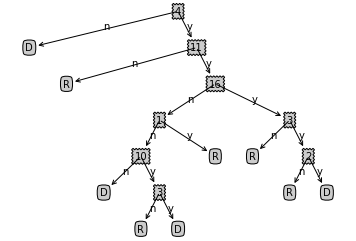

[0.875, 0.9361702127659575, 0.9428571428571428, 0.956989247311828, 0.9655172413793104]


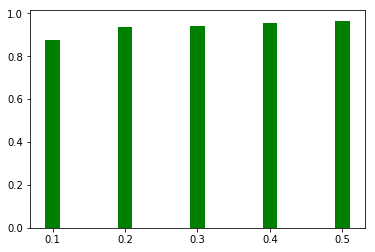

In [10]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import treePlot

if __name__ == "__main__":
    df = pd.read_csv("house-votes-1984.txt", header = None)
    originaldataset = df[df[:] != '?'].dropna()
    label_list = originaldataset[0]
    information_gain_list = []
    features = [i for i in range(1,17)]
    name_list = ['0.1','0.2','0.3','0.4','0.5']
    accuracy_list = []
    for i in range(1,6):
        test_size = 0.1 * i
        dataset, test_dataset = train_test_split(originaldataset,test_size=test_size,random_state=0,shuffle = True)
        tree = DecisionTree(dataset,dataset,features,label_index = 0)
        # Build the subtree when test_size = 0.3
        if i == 3:
            treePlot.createPlot(tree)
            accuracy_before = test_function(X_test,tree,y_test)
        y_test = test_dataset[0]
        X_test = test_dataset.drop(columns = 0, axis = 1)
        accuracy = test_function(X_test,tree,y_test)
        accuracy_list += [accuracy]
    print(accuracy_list)
    plt.bar(range(len(accuracy_list)),accuracy_list,color = 'green',tick_label = name_list,width = 0.2)
    plt.show()

### Exercise 2  Find the most prominent feature

The column number of the most prominent feature is 4.
The root of DecisionTree is feature 4. And it depends on information_gain_list, obviously the index of the biggest information gain value is 4.

### Exercise 3 Prun the decision tree

#### the Prun Decision Tree pseudocode：

    function postPrunTree(tree,dataset,accuracy_before,accuracy_after):
        Get the keys of the dict
        for key in dict:
            extract the branch node in the tree
            sub_tree =(postPrunTree(tree,dataset,accuracy_before,accuracy_after)
        for every node of subtree
            obtain the accuracy_before before it is pruned
            obtain the accuracy_after if it is pruned
            if accuracy_after > accuracy_before
                prun decision tree
                return majorityClass
        return tree

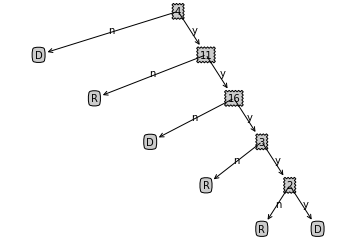

0.9571428571428572
[0.9428571428571428, 0.9571428571428572]


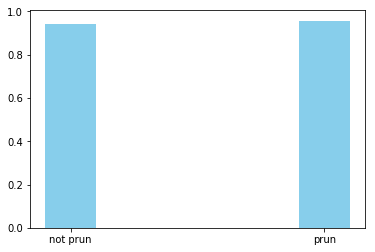

In [8]:
import treePlot
def postPrunTree(tree, node_list, X_test, y_test,accuracy_before,accuracy_after,count):
    firstKey = list(tree.keys())[0]
    secondDict = tree[firstKey]
    accuracy_before = accuracy_before
    accuracy_after = test_function(X_test,tree,y_test)    
    before_list.append(accuracy_before)
    after_list.append(accuracy_after)
    for key in secondDict.keys():
        # Find the node of the corresponding branch and then cut the branch
        if type(secondDict[key]).__name__=='dict':
            if type(firstKey).__name__ == 'int':
                node_list.append(firstKey)
                tree[firstKey][key]=postPrunTree(secondDict[key],node_list,X_test, y_test,accuracy_after,accuracy_after,count) 
    count += 1
    lenlist= len(before_list)
    i = lenlist - count
    if before_list[i] < after_list[i] :
        majorityClassFeat = majorityClass(X_test,firstKey)
        majorityClassVal = tree[firstKey][majorityClassFeat]
        #print(majorityClassVal)
        return majorityClassVal
    return tree
df = pd.read_csv("house-votes-1984.txt", header = None)
originaldataset = df[df[:] != '?'].dropna()
dataset, test_dataset = train_test_split(originaldataset,test_size=0.3,random_state=42,shuffle = True)
y_test = test_dataset[0]
X_test = test_dataset.drop(columns = 0, axis = 1)
accuracy = 0.9428571428571428
node_list = []
before_list = []
after_list = []
count = 0
prunTree = postPrunTree(tree, node_list, X_test, y_test,accuracy,accuracy,count)
treePlot.createPlot(prunTree)
prun_accuracy = test_function(X_test,prunTree,y_test)
print(prun_accuracy)
accuracy_list = [accuracy,prun_accuracy]
print(accuracy_list)
name_list = ['not prun','prun']
plt.bar(range(len(accuracy_list)),accuracy_list,color = 'skyblue',width = 0.2,tick_label = name_list)
plt.show()

The accuracy is 0.957 by prunning the decision tree, and it is improved about 1%.

### Exercise 4  Decision Tree at depth 1, 2, 3

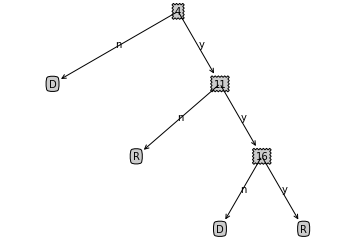

In [9]:
# depth at 1,2,3
import treePlot

def firstKey(tree):
    firstKey = list(tree.keys())[0]
    return firstKey
tree1 = prunTree[firstKey(prunTree)]['y']
tree2 = tree1[firstKey(tree1)]['y']
tree2[firstKey(tree2)]['y'] = 'R'
treePlot.createPlot(prunTree)

## Machine Learning Pre Lab #2 SVM

### Exercise  

![title](/Users/jiahuiwang/Downloads/machine learning/Prelab2SVM.jpeg)

Divide the pictures in ..*CarData/TrainImages* into ..*CarData/TrainImages/pos* and ..*CarData/TrainImages/neg*

![title](/Users/jiahuiwang/Downloads/machine learning/Prelab2SVM2.jpeg)

**The Detection Result**

    # Run the test
    '''
    python3 extract_features.py -p ./CarData/TrainImages/pos -n ./CarData/TrainImages/neg
    python3 train_classifier.py
    python3 test_classifier.py -i 'CarData/TestImages/test-1.pgm'
    '''

![title](/Users/jiahuiwang/Downloads/machine learning/Prelab2SVM3.jpeg)

### Question

**Characters of HOG**

* Used widely at Computer vision and Image processing to detect objects. 
* Computing on dense grid of uniformly spaced cells and uses overlapping lacal contrast normalization for improving accuracy
* The representation and shape of a local target can be well described by the directional density distribution of the gradient or edge in an image.


**Achieve feature descriptors**

For target image:
* Graying
* Standardization(normalization) of color space of image by Gamma correction 
* Calculate the gradient of each pixel in the image
* Divide the image into small cells
* Count the gradient histogram of each cell
* Putting the descriptor of all the cells together to get the descriptor of the block
* Putting the descriptor of all the cells together to get the descriptor of the HOG

**Sliding-windows algorithm for object detection**

Sliding-windows algorithm is used to detect object accurately in a test images.
* Pick sliding window of size(x) 
* Feed input region(x) to trained convert by sliding window over every part of input image
* For each input region, convnet outputs whether it has a car or not.

The smaller step size is, the more windows will need to examine.
Increasing window and stride size makes it faster but at cost of decreased accuracy.

**Non-Maximum Suppression**

NMS is used to extract the windows(sliding-windows) of the max score. As we all know, sliding-windows will lead to cross some windows or involve them with each other. NMS choose the max value of the windows to suppress Windows with low scores.

How to choose the max value of the windows?
Suppose that there are 6 rectangular boxs. Sort by category of classifier, possibility of the cars is A < B < C < D < E < F.

1. Starting from the rectangle box F with the maximum probability, the IOU of the overlapping degree between A~E and F is greater than A certain threshold.

2. If the overlap degree of B, D and F exceeds the threshold, B and D will be discarded; And mark the first rectangle F, which we have left.

3. Select the most probable E from the remaining rectangular boxes A, C and E, and then judge the degree of overlap between E and A and C. If the degree of overlap is greater than A certain threshold, throw away; And mark E is the second rectangle we have left.

You keep repeating, and you find all the boxes that are left.